In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.colors import LinearSegmentedColormap

def visualize_gradient_score(score):
    """
    Visualize a score (0 to 1) as a horizontal gradient bar,
    smooth color transitions, and a strength label.
    """

    fig, ax = plt.subplots(figsize=(6, 1.2))
    ax.axis("off")

    # Create gradient colormap: red -> orange -> yellow -> green
    cmap = LinearSegmentedColormap.from_list("score_cmap", ["red", "orange", "yellow", "green"])

    # Draw background gradient
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    ax.imshow(gradient, extent=[0, 1, 0.3, 0.7], cmap=cmap, aspect="auto")

    # Overlay white for the portion after the score
    if score < 1.0:
        ax.add_patch(plt.Rectangle((score, 0.3), 1 - score, 0.4, color='white'))

    # Rounded border frame
    frame = FancyBboxPatch(
        (0, 0.3), 1.0, 0.4,
        boxstyle="round,pad=0.05",
        edgecolor='lightgray',
        facecolor='none',
        linewidth=1.2
    )



    ax.add_patch(frame)

    # ✅ Draw a fixed outer frame to indicate the full range
    ax.add_patch(patches.Rectangle((0, 0.3), 1.0, 0.4, edgecolor='gray', facecolor='none', linewidth=1))

    # Choose strength label and color
    if score < 0.33:
        label = "weak"
        color = "red"
    elif score < 0.66:
        label = "medium"
        color = "orange"
    else:
        label = "strong"
        color = "green"

    # Add label to the right of the bar
    ax.text(1.02, 0.5, label, va="center", ha="left",
            fontsize=12, fontweight="bold", color=color,
            transform=ax.transAxes)
    # Add score value next to label
    ax.text(1.03, 0.35, f"{score:.2f}", va="center", ha="left",
            fontsize=12, fontweight="bold", color="black",
            transform=ax.transAxes)

    plt.show()




##Example

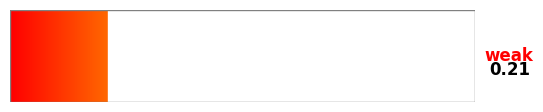

In [20]:
visualize_gradient_score(0.21)

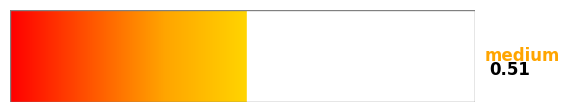

In [21]:
visualize_gradient_score(0.51)

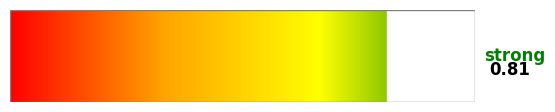

In [22]:
visualize_gradient_score(0.81)